In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Load the dataset
glass_data = pd.read_excel('glass.xlsx', sheet_name='glass')
glass_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
# TASK 1: Exploratory Data Analysis (EDA)

# 1. Check the structure of the dataset
print("Dataset Info:")
glass_data.info()

# Check for missing values
print("\nMissing Values:")
print(glass_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Descriptive Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    

In [10]:
# Descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(glass_data.describe())


Descriptive Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    

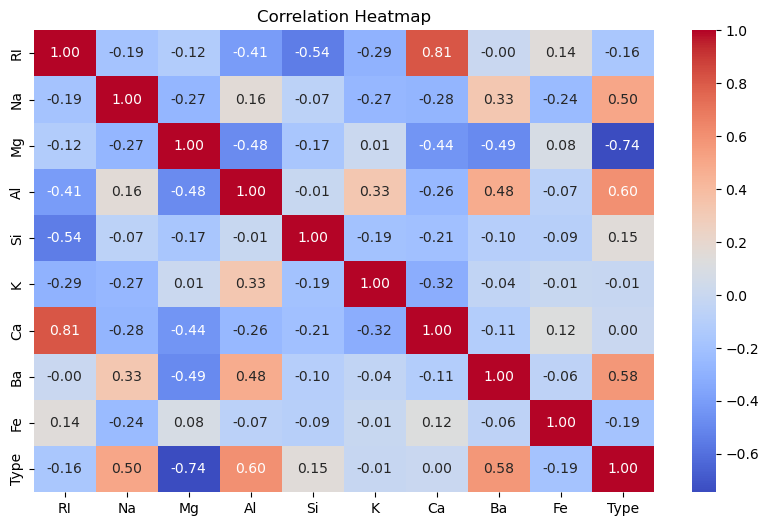

In [12]:
# TASK 2: Data Visualization

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(glass_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

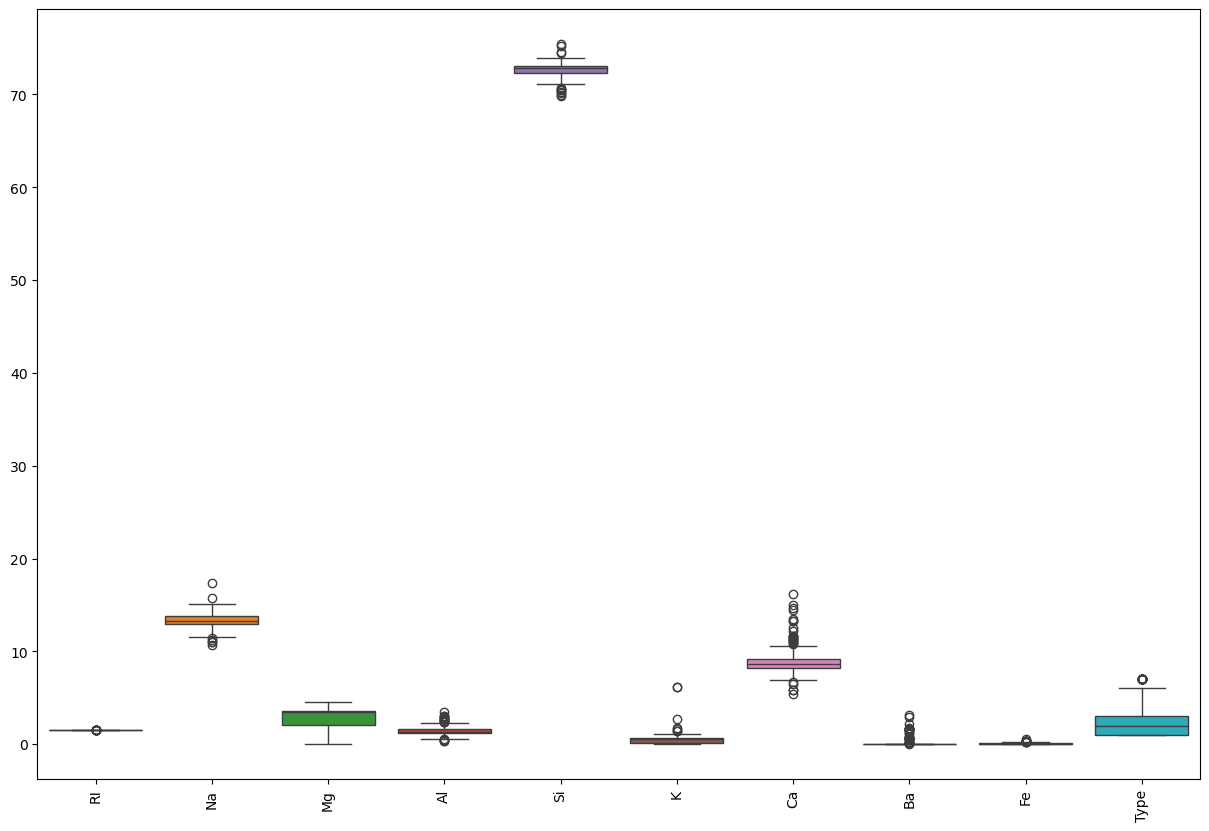

In [14]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=glass_data)
plt.xticks(rotation=90)
plt.show()

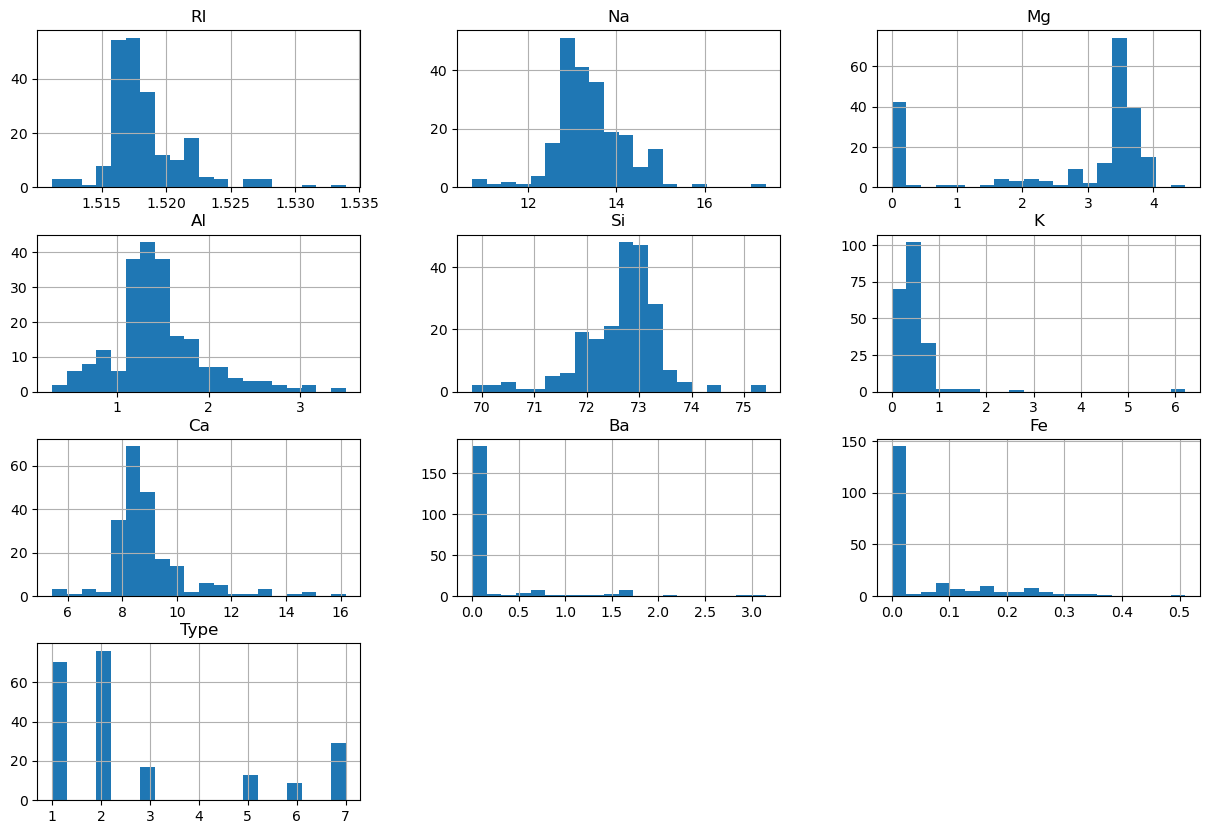

In [13]:
# Histograms
glass_data.hist(bins=20, figsize=(15, 10))
plt.show()

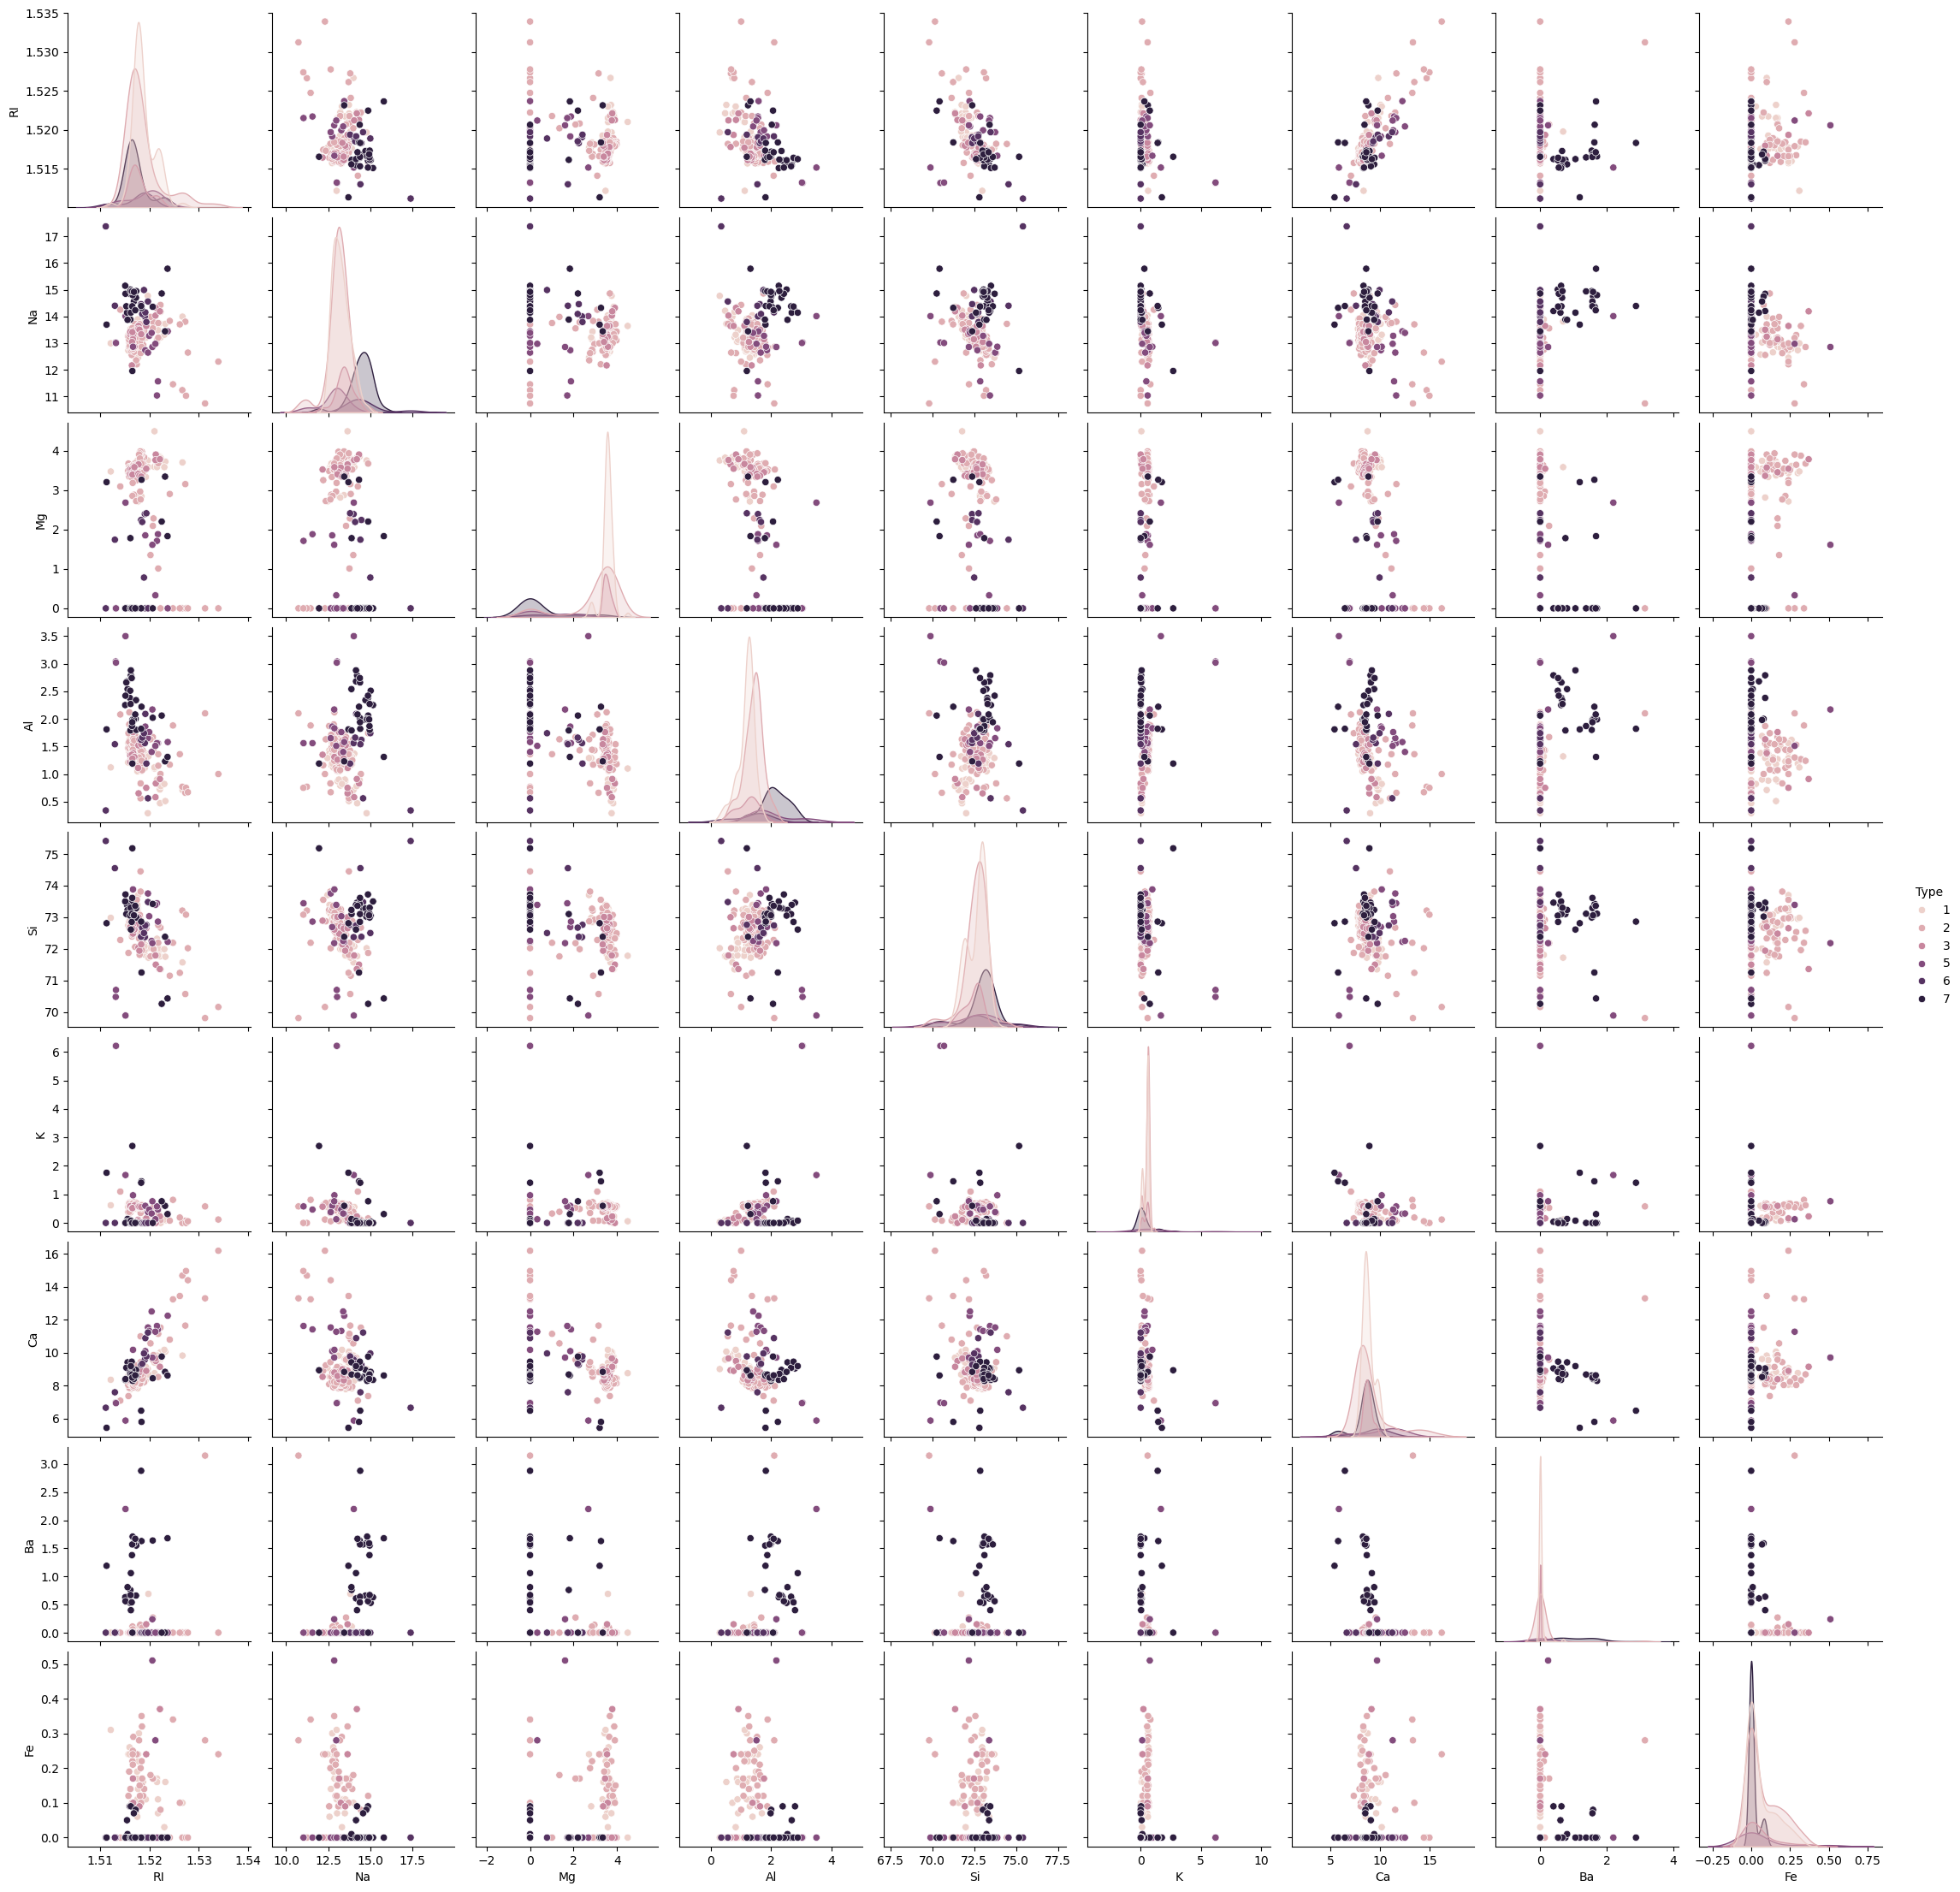

In [11]:
# Pairplot of the features
sns.pairplot(glass_data, hue='Type')
plt.show()

In [34]:
# 3. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(glass_data.drop('Type', axis=1))
glass_data_scaled = pd.DataFrame(scaled_features, columns=glass_data.columns[:-1])
glass_data_scaled['Type'] = glass_data['Type']

scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [35]:
# Handling Imbalanced Data
# Check class distribution
print("Class distribution in target variable:")
print(glass_data_scaled['Type'].value_counts())

Class distribution in target variable:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [37]:
# TASK 4: Random Forest Model Implementation
X = glass_data_scaled.drop('Type', axis=1)
y = glass_data_scaled['Type']
# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test
# 2. Implement Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Evaluate the model
y_pred = rf_model.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [40]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")


Random Forest Model Evaluation:
Accuracy: 0.7692307692307693
Precision: 0.7661700618222356
Recall: 0.7692307692307693
F1 Score: 0.7601294829201807


In [41]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17  2  0  0  0  0]
 [ 4 15  1  1  1  1]
 [ 2  0  2  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



In [44]:
# TASK 5: Bagging and Boosting Methods

# Bagging with Random Forest as base model
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

# Bagging evaluation
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"\nBagging Accuracy: {bagging_accuracy:}")


Bagging Accuracy: 0.7846153846153846


In [53]:
# Boosting using AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

# Boosting evaluation
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print(f"\nBoostingin Accuracy: {boosting_accuracy:}")


Boostingin Accuracy: 0.5076923076923077


C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [51]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 0.8


# --- Interview Questions ---

# 1. Explain Bagging and Boosting methods. How is it different from each other?

"""
Bagging (Bootstrap Aggregating):
- Bagging is a parallel ensemble method where multiple models are trained independently on different subsets of data, usually created by bootstrapping (random sampling with replacement).
- The predictions of these models are then aggregated (e.g., by voting) to make the final prediction.
- Random Forest is a common example of a Bagging method.

Boosting:
- Boosting is a sequential ensemble method where models are trained one after another, with each new model focusing on the errors made by the previous models.
- The goal is to reduce the bias by learning from mistakes, and models are combined to create a strong final model.
- AdaBoost and Gradient Boosting are examples of Boosting methods.

Difference:
- Bagging focuses on reducing variance by training models independently and combining their outputs.
- Boosting focuses on reducing bias by learning sequentially and improving model performance iteratively.

"""

# 2. Explain how to handle imbalance in the data.

"""
Handling Imbalanced Data:
1. Resampling techniques:
   - Oversampling the minority class (e.g., using SMOTE or Random OverSampling).
   - Undersampling the majority class.
2. Changing performance metrics:
   - Instead of accuracy, use precision, recall, F1-score, or area under the ROC curve (AUC).
3. Use ensemble methods:
   - Random Forest or Boosting methods like AdaBoost can handle imbalanced data better than individual models.
4. Assign class weights:
   - Some algorithms, like Random Forest, allow assigning higher weights to the minority class to handle imbalanced data.
"""
